In [13]:
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from tensorflow.keras.layers import Dense , Dropout
from scikeras.wrappers import KerasRegressor 
from tensorflow.keras.callbacks import EarlyStopping
import time
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from keras_tuner import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import GridSearchCV

In [14]:
#data = pd.read_pickle('C:/Users/erikm/Desktop/Diplomarbeit Erik Marr/Daten/Finish/TPath_300_finish_data.pkl')
data = pd.read_pickle('C:/Users/erikm/Desktop/Diplomarbeit Erik Marr/Daten/Finish/Finish_D3_I7000_F9000/TPath_500_finish_data_D3.pkl')

data

,X-Koordinate,Y-Koordinate,Zeitpunkt,Strom,Kraft,Temperatur
0,0.00000,-0.00200,500,7000,9000,669.05
1,0.00000,-0.00196,500,7000,9000,696.80
2,0.00000,-0.00192,500,7000,9000,724.42
3,0.00000,-0.00188,500,7000,9000,751.84
4,0.00000,-0.00184,500,7000,9000,779.83
...,...,...,...,...,...,...
6358,0.00248,0.00184,500,7000,9000,651.36
6359,0.00248,0.00188,500,7000,9000,612.09
6360,0.00248,0.00192,500,7000,9000,584.59
6361,0.00248,0.00196,500,7000,9000,578.64


In [15]:
df = data.drop(data.columns[2:5], axis = 1)
df

,X-Koordinate,Y-Koordinate,Temperatur
0,0.00000,-0.00200,669.05
1,0.00000,-0.00196,696.80
2,0.00000,-0.00192,724.42
3,0.00000,-0.00188,751.84
4,0.00000,-0.00184,779.83
...,...,...,...
6358,0.00248,0.00184,651.36
6359,0.00248,0.00188,612.09
6360,0.00248,0.00192,584.59
6361,0.00248,0.00196,578.64


In [16]:
df1 = df.sample(frac=1, random_state=42)  # Hier wird 42 als Random State verwendet, um die Ergebnisse reproduzierbar zu machen

print(df1)
df_reset = df1.reset_index(drop=True)
df_reset

      X-Koordinate  Y-Koordinate  Temperatur
6243       0.00244       0.00128      978.37
2949       0.00116      -0.00120     1193.00
393        0.00012       0.00160      816.01
3844       0.00152      -0.00176      827.43
2154       0.00084      -0.00068     1419.40
...            ...           ...         ...
3772       0.00148      -0.00060     1381.60
5191       0.00204      -0.00040     1320.60
5226       0.00204       0.00100     1122.50
5390       0.00212      -0.00052     1288.40
860        0.00032       0.00008     1509.50

[6363 rows x 3 columns]


,X-Koordinate,Y-Koordinate,Temperatur
0,0.00244,0.00128,978.37
1,0.00116,-0.00120,1193.00
2,0.00012,0.00160,816.01
3,0.00152,-0.00176,827.43
4,0.00084,-0.00068,1419.40
...,...,...,...
6358,0.00148,-0.00060,1381.60
6359,0.00204,-0.00040,1320.60
6360,0.00204,0.00100,1122.50
6361,0.00212,-0.00052,1288.40


In [17]:
label = df_reset["Temperatur"]
# Korrektur: Verwenden Sie den Spaltennamen direkt, ohne Indexierung der columns-Eigenschaft
df1 = df_reset.drop("Temperatur", axis=1)
X = df1
y = label


In [18]:
X

,X-Koordinate,Y-Koordinate
0,0.00244,0.00128
1,0.00116,-0.00120
2,0.00012,0.00160
3,0.00152,-0.00176
4,0.00084,-0.00068
...,...,...
6358,0.00148,-0.00060
6359,0.00204,-0.00040
6360,0.00204,0.00100
6361,0.00212,-0.00052


In [19]:
y

0        978.37
1       1193.00
2        816.01
3        827.43
4       1419.40
         ...   
6358    1381.60
6359    1320.60
6360    1122.50
6361    1288.40
6362    1509.50
Name: Temperatur, Length: 6363, dtype: float64

In [20]:
 # train_df enthält 80% der Daten, test_df enthält 20% der Daten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [21]:
# Initialisiere einen MinMaxScaler für die Features
scaler_features = MinMaxScaler()
scaler_features2 = MinMaxScaler()
# Skaliere X_train und X_test
X_train_scaled = scaler_features.fit_transform(X_train)
X_test_scaled = scaler_features.transform(X_test)  # Nutze gleiche Skalierungsparameter ohne das X_Test Informationen einfließen

# Initialisiere einen SEPARATEN MinMaxScaler für das Ziel, wenn nötig
scaler_target = MinMaxScaler()


# Skaliere y_train und y_test. Beachte, dass y_train.reshape(-1, 1) verwendet wird, da MinMaxScaler 
# erwartet, dass die Eingaben als 2D-Arrays kommen, und Ziele normalerweise als 1D-Arrays vorliegen.
y_train_scaled = scaler_target.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_target.transform(y_test.values.reshape(-1, 1))


In [22]:
X_train_scaled

array([[0.96774194, 0.58      ],
       [0.12903226, 0.07      ],
       [0.03225806, 0.07      ],
       ...,
       [0.01612903, 0.25      ],
       [0.67741935, 0.82      ],
       [0.5483871 , 0.65      ]])

In [23]:
y_train_scaled.max()

0.9999999999999999

In [24]:
# Netzwerkarchitektur
model = Sequential([

    Dense(248, activation='relu', input_shape=(2,), kernel_initializer='he_uniform', kernel_regularizer=l2(0.0001)),

    Dense(296, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.0001)),
    
    Dense(280, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.0001)),
    
    Dense(216, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.0001)),
    
    Dense(184, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.0001)),
    
    Dense(40, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.0001)),
    
    Dense(312, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.0001)),
    
    Dense(200, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.0001)),
    
    Dense(104, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.0001)),

    Dense(1 , activation = 'linear')
])

# Optimierer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

# Modell kompilieren (Verwendung von mean_squared_error als Verlustfunktion für Regression)
model.compile(optimizer=optimizer,
              loss='mean_squared_error',
              metrics=['mae'])  # Metriken für Regression: Mean Absolute Error und Mean Squared Error

# Early Stopping Callback
early_stopping = EarlyStopping(monitor='loss', patience=5, verbose=1, mode='min', restore_best_weights=True)

# Trainingsparameter
batch_size = 25
epochs = 500

# Modell trainieren (Annahme: X_train, y_train, X_val, y_val sind vordefiniert)
history = model.fit(X_train_scaled, y_train_scaled,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/500
163/163 [==============================] - 3s 5ms/step - loss: 0.4889 - mae: 0.2923 - val_loss: 0.4246 - val_mae: 0.2348
Epoch 2/500
163/163 [==============================] - 1s 4ms/step - loss: 0.3606 - mae: 0.1590 - val_loss: 0.3058 - val_mae: 0.0680
Epoch 3/500
163/163 [==============================] - 1s 4ms/step - loss: 0.2906 - mae: 0.0528 - val_loss: 0.2767 - val_mae: 0.0431
Epoch 4/500
163/163 [==============================] - 1s 4ms/step - loss: 0.2636 - mae: 0.0258 - val_loss: 0.2533 - val_mae: 0.0217
Epoch 5/500
163/163 [==============================] - 1s 4ms/step - loss: 0.2448 - mae: 0.0154 - val_loss: 0.2376 - val_mae: 0.0221
Epoch 6/500
163/163 [==============================] - 1s 4ms/step - loss: 0.2356 - mae: 0.0450 - val_loss: 0.2248 - val_mae: 0.0183
Epoch 7/500
163/163 [==============================] - 1s 4ms/step - loss: 0.2193 - mae: 0.0134 - val_loss: 0.2142 - val_mae: 0.0078
Epoch 8/500
163/163 [==============================] - 1s 4ms/step - 

In [25]:
results = model.evaluate(X_test_scaled, y_test_scaled, verbose=2)
results

40/40 - 0s - loss: 0.0014 - mae: 0.0051 - 60ms/epoch - 1ms/step


[0.0014465928543359041, 0.0050717745907604694]

In [26]:

scaled_predicted_values = model.predict(X_test_scaled, verbose = 0)

# Führen Sie die Rücktransformation der skalierten Werte durch
original_predicted_values = scaler_target.inverse_transform(scaled_predicted_values)
original_actual_values = scaler_target.inverse_transform(y_test_scaled)  # y_test sind die skalierten tatsächlichen Werte
print(f' Bsp. Predicted: {original_predicted_values[100]} Actual: {original_actual_values[100]} ')

def calculate_mae(list1, list2):
    # Stelle sicher, dass beide Listen die gleiche Länge haben
    if len(list1) != len(list2):
        raise ValueError("Listen müssen die gleiche Länge haben")

    # Berechne die absolute Differenz zwischen den Elementen der Listen
    differences = [abs(x - y) for x, y in zip(list1, list2)]

    # Berechne den Durchschnitt der absoluten Differenzen
    mae = sum(differences) / len(differences)

    return mae

# Beispiel
list1 = original_predicted_values
list2 = original_actual_values

mae = calculate_mae(list1, list2)
print(f"Durchschnittliche Abweichung (MAE): {mae}")

 Bsp. Predicted: [1462.3865] Actual: [1463.6] 
Durchschnittliche Abweichung (MAE): [4.79824349]


In [27]:
def calculate_r_squared(predicted, actual):
    # Berechnung des Mittelwerts der tatsächlichen Werte
    mean_actual = sum(actual) / len(actual)
    
    # Berechnung der totalen Summe der Quadrate (SST)
    sst = sum((x - mean_actual) ** 2 for x in actual)
    
    # Berechnung der Summe der Quadrate der Residuen (SSE)
    sse = sum((actual[i] - predicted[i]) ** 2 for i in range(len(actual)))
    
    # Berechnung des R^2-Wertes
    r_squared = 1 - (sse / sst)
    
    return r_squared

# Berechnung von R^2 mit den bereitgestellten Listen
r_squared = calculate_r_squared(list1, list2)

print(f"R^2: {r_squared}")

R^2: [0.99944471]


In [28]:
df_result = pd.DataFrame({'Echt': [val[0] for val in list1], 'Vorhergesagt': [val[0] for val in list2]})
df_result['X-Koordinate'] = X_test_scaled[:, 0]
df_result['Y-Koordinate'] = X_test_scaled[:, 1]

df_result['Differenz'] = df_result['Echt'] - df_result['Vorhergesagt']
df_result['Differenz'].sort_values()
sorted_df = df_result.sort_values(by= 'Differenz')
Anzahl_Punkte = (sorted_df['Differenz'] < -20).sum()
print("Anzahl der Werte die kleiner sind:", Anzahl_Punkte)

sorted_df

Anzahl der Werte die kleiner sind: 13


,Echt,Vorhergesagt,X-Koordinate,Y-Koordinate,Differenz
302,718.482117,755.11,1.000000,0.93,-36.627883
423,869.190613,898.99,1.000000,0.87,-29.799387
542,849.398682,877.41,0.983871,0.88,-28.011318
656,772.105347,799.88,0.951613,0.91,-27.774653
642,825.466248,852.98,0.967742,0.89,-27.513752
...,...,...,...,...,...
34,1104.227051,1086.80,1.000000,0.24,17.427051
482,681.660034,660.80,0.806452,0.00,20.860034
1104,693.596191,672.09,0.983871,0.00,21.506191
354,691.588196,669.05,0.000000,0.00,22.538196


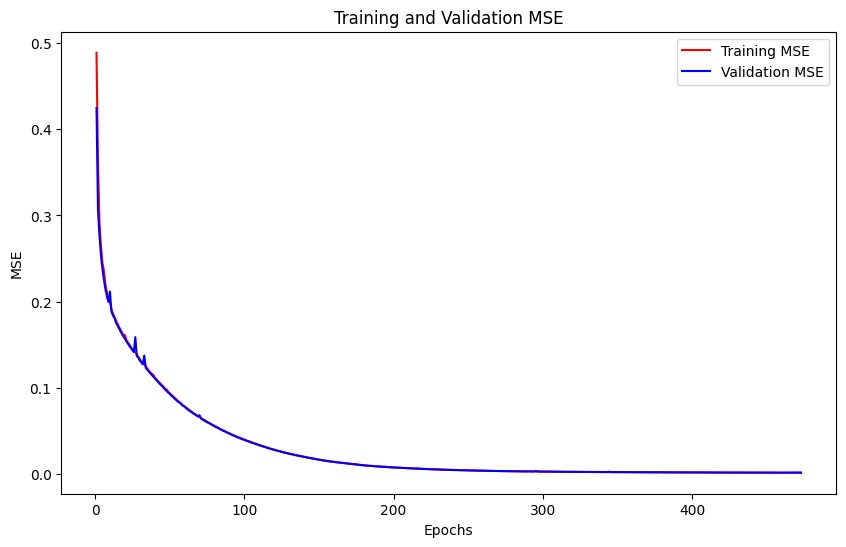

In [29]:
mae = history.history['loss']
val_mae = history.history['val_loss']

epochs = range(1, len(mae) + 1)

# MAE Diagramm
plt.figure(figsize=(10, 6))
plt.plot(epochs, mae, 'r', label='Training MSE')
plt.plot(epochs, val_mae, 'b', label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.savefig('C:/Users/erikm/Desktop/Diplomarbeit Erik Marr/Bilder Diplomarbeit/MSE_NeuroNetz/MSE_NeuroNetz_D3_1')

plt.show()


# GridSearch

In [30]:
# def build_model(learning_rate=0.001, activation='relu', regularization=0.0001, dropout_rate=0.0):
#     model = Sequential()
#     model.add(Dense(200, activation=activation, input_shape=(2,), kernel_initializer='he_uniform', kernel_regularizer=l2(regularization)))
#     model.add(Dropout(dropout_rate))
# 
#     model.add(Dense(448, activation=activation, kernel_initializer='he_uniform', kernel_regularizer=l2(regularization)))
#     model.add(Dropout(dropout_rate))
# 
#     model.add(Dense(352, activation=activation, kernel_initializer='he_uniform', kernel_regularizer=l2(regularization)))
#     model.add(Dropout(dropout_rate))
# 
#     model.add(Dense(320, activation=activation, kernel_initializer='he_uniform', kernel_regularizer=l2(regularization)))
#     model.add(Dropout(dropout_rate))
# 
#     model.add(Dense(256, activation=activation, kernel_initializer='he_uniform', kernel_regularizer=l2(regularization)))
#     model.add(Dropout(dropout_rate))
# 
#     model.add(Dense(416, activation=activation, kernel_initializer='he_uniform', kernel_regularizer=l2(regularization)))
#     model.add(Dropout(dropout_rate))
# 
#     model.add(Dense(128, activation=activation, kernel_initializer='he_uniform', kernel_regularizer=l2(regularization)))
#     model.add(Dropout(dropout_rate))
# 
#     model.add(Dense(96, activation=activation, kernel_initializer='he_uniform', kernel_regularizer=l2(regularization)))
#     model.add(Dropout(dropout_rate))    
# 
#     model.add(Dense(32, activation=activation, kernel_initializer='he_uniform', kernel_regularizer=l2(regularization)))
#     model.add(Dropout(dropout_rate))
# 
#     model.add(Dense(1, activation='linear'))
#     model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error', metrics=['mae'])
#     return model
# 
# # Verwenden Sie eine Funktion, um das Modell zu instanziieren, für scikit-learn Wrapper
# model = KerasRegressor(model=build_model, verbose=2)
# 
# # Anpassung der Parameter im param_grid
# param_grid = {
#     'model__learning_rate': [0.01, 0.001, 0.0001],
#     'model__regularization': [0.001, 0.0001],
#     'fit__batch_size': [25, 50, 75, 100],
#     'fit__epochs': [50],
#     'model__dropout_rate' : [0.0, 0.1, 0.2]
# }
# 
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, verbose=2)
# # Hinweis: Stellen Sie sicher, dass Ihre Daten (X_train_scaled, y_train_scaled) korrekt definiert sind
# grid_result = grid_search.fit(X_train_scaled, y_train_scaled)
# # Beste Parameter und Score ausgeben
# print("Beste Parameter:", grid_search.best_params_)
# print("Beste Genauigkeit:", grid_search.best_score_)
# 
# with open("Gridsearch_D3.txt", "w") as f:
#     f.write(f"Beste Parameter: {grid_search.best_params_}\n")
#     f.write(f"Beste Genauigkeit: {grid_search.best_score_}")


# Random Search

In [31]:
# # Funktion zum Erstellen des Modells
# def build_model(hp):
#     model = Sequential()
#     model.add(Dense(hp.Int('input_units', min_value=8, max_value=328, step=16), input_shape=(2,), activation='relu'))
#     for i in range(hp.Int('n_layers', 1, 10)):
#         model.add(Dense(hp.Int(f'units_{i}', min_value=8, max_value=328, step=16), activation='relu'))
#     model.add(Dense(1, activation='linear'))
#     model.compile(optimizer='adam', loss='mean_squared_error')
#     return model
# 
# # Durchführung der Random Search dreimal
# for run in range(1, 4):
#     # Anpassen des Verzeichnisses und des Projektnamens für jeden Durchlauf
#     directory = 'random_search'
#     project_name = f'random_search_D3_{run}'
#     
#     tuner = RandomSearch(
#         build_model,
#         objective='val_loss',
#         max_trials=100,
#         executions_per_trial=1,
#         directory=directory,
#         project_name=project_name
#     )
#     
#     # Durchführung des Random Search
#     tuner.search(X_train_scaled, y_train_scaled, epochs=50, verbose =0, batch_size=50, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=5)])
#     
#     # Abrufen und Speichern des besten Modells
#     best_model = tuner.get_best_models(num_models=1)[0]
#     model_path = os.path.join(directory, project_name, 'best_model.h5') 
#     best_model.save(model_path)
#     
# 
#     # Optional: Abrufen und Ausgeben der besten Hyperparameter
#     best_hyperparameters = tuner.get_best_hyperparameters()[0]
#     
#     # Konvertieren der Hyperparameter in ein DataFrame
#     df_hyperparameters = pd.DataFrame([best_hyperparameters.values])
#     # Speichern des DataFrame als CSV
#     df_hyperparameters.to_csv(f'random_search_D3_{run}.csv', index=False)
#     
#     print(f"Beste Hyperparameter für Lauf {run}: {best_hyperparameters.values}")